# Clustering

In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

### Lectura del dataset preprocesado

In [2]:
FILE_PATH = "../Data/numerical.csv"

In [3]:
df = pd.read_csv(FILE_PATH, encoding='utf-8', error_bad_lines=False)

In [4]:
df

,brand,model,OS,RAM,approx_price_EUR,battery_removable,battery_type,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Acer,Iconia Talk S,Android,2,170.0,False,Li-Ion,3400.0,4,1.30,13,2,32
1,Acer,Liquid Z6 Plus,Android,3,250.0,True,Li-Po,4080.0,8,1.30,13,5,32
2,Acer,Liquid Z6,Android,1,120.0,True,Li-Ion,2000.0,4,1.25,8,2,8
3,Acer,Iconia Tab 10 A3-A40,Android,2,230.0,False,Li-Ion,NaN,4,1.30,5,2,64
4,Acer,Liquid X2,Android,3,230.0,True,Li-Po,4020.0,8,1.30,13,13,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,ZTE,Optik,Android,1,230.0,False,Li-Ion,4000.0,2,1.20,5,2,16
2486,ZTE,Light Tab 2 V9A,Android,512,250.0,False,Li-Ion,3400.0,1,1.40,3.2,VGA,4
2487,ZTE,Tania,Microsoft,512,210.0,True,Li-Ion,1400.0,1,1.00,5,No,4
2488,ZTE,Blade,Android,512,170.0,True,Li-Ion,1250.0,1,0.60,3.15,No,512


### Eliminación valores NULL

In [5]:
df = df.dropna()
# Reset a los valores del index en el dataframe #
df = df.reset_index(drop=True)

In [6]:
df

,brand,model,OS,RAM,approx_price_EUR,battery_removable,battery_type,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Acer,Iconia Talk S,Android,2,170.0,False,Li-Ion,3400.0,4,1.30,13,2,32
1,Acer,Liquid Z6 Plus,Android,3,250.0,True,Li-Po,4080.0,8,1.30,13,5,32
2,Acer,Liquid Z6,Android,1,120.0,True,Li-Ion,2000.0,4,1.25,8,2,8
3,Acer,Liquid X2,Android,3,230.0,True,Li-Po,4020.0,8,1.30,13,13,32
4,Acer,Liquid Zest Plus,Android,2,200.0,False,Li-Ion,5000.0,4,1.30,13,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,ZTE,Optik,Android,1,230.0,False,Li-Ion,4000.0,2,1.20,5,2,16
2268,ZTE,Light Tab 2 V9A,Android,512,250.0,False,Li-Ion,3400.0,1,1.40,3.2,VGA,4
2269,ZTE,Tania,Microsoft,512,210.0,True,Li-Ion,1400.0,1,1.00,5,No,4
2270,ZTE,Blade,Android,512,170.0,True,Li-Ion,1250.0,1,0.60,3.15,No,512


### Conversión de columnas a valores numéricos

In [7]:
columns = ['brand', 'OS', 'battery_removable', 'battery_type', 'primary_camera_mp']
encoder = preprocessing.LabelEncoder()
df_encoded = df[columns].apply(encoder.fit_transform)
df_encoded

,brand,OS,battery_removable,battery_type,primary_camera_mp
0,0,1,0,0,8
1,0,1,1,1,8
2,0,1,1,0,34
3,0,1,1,1,8
4,0,1,0,0,8
...,...,...,...,...,...
2267,60,1,0,0,32
2268,60,1,0,0,29
2269,60,10,1,0,32
2270,60,1,1,0,28


In [8]:
df = df.drop(columns, axis=1)
df

,model,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,secondary_camera_mp,internal_memory_gb
0,Iconia Talk S,2,170.0,3400.0,4,1.30,2,32
1,Liquid Z6 Plus,3,250.0,4080.0,8,1.30,5,32
2,Liquid Z6,1,120.0,2000.0,4,1.25,2,8
3,Liquid X2,3,230.0,4020.0,8,1.30,13,32
4,Liquid Zest Plus,2,200.0,5000.0,4,1.30,5,16
...,...,...,...,...,...,...,...,...
2267,Optik,1,230.0,4000.0,2,1.20,2,16
2268,Light Tab 2 V9A,512,250.0,3400.0,1,1.40,VGA,4
2269,Tania,512,210.0,1400.0,1,1.00,No,4
2270,Blade,512,170.0,1250.0,1,0.60,No,512


In [9]:
df = df.join(df_encoded)
df

,model,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,secondary_camera_mp,internal_memory_gb,brand,OS,battery_removable,battery_type,primary_camera_mp
0,Iconia Talk S,2,170.0,3400.0,4,1.30,2,32,0,1,0,0,8
1,Liquid Z6 Plus,3,250.0,4080.0,8,1.30,5,32,0,1,1,1,8
2,Liquid Z6,1,120.0,2000.0,4,1.25,2,8,0,1,1,0,34
3,Liquid X2,3,230.0,4020.0,8,1.30,13,32,0,1,1,1,8
4,Liquid Zest Plus,2,200.0,5000.0,4,1.30,5,16,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,Optik,1,230.0,4000.0,2,1.20,2,16,60,1,0,0,32
2268,Light Tab 2 V9A,512,250.0,3400.0,1,1.40,VGA,4,60,1,0,0,29
2269,Tania,512,210.0,1400.0,1,1.00,No,4,60,10,1,0,32
2270,Blade,512,170.0,1250.0,1,0.60,No,512,60,1,1,0,28


In [31]:
df.drop(df[df['internal_memory_gb'] == '16GB'].index, inplace = True)

### Obtención de características

In [32]:
features = ['approx_price_EUR', 'battery_mah', 'CPU_cores', 'battery_mah', 'CPU_speed',
            'internal_memory_gb', 'brand', 'OS', 'battery_removable','battery_type', 'primary_camera_mp']

In [33]:
x = df[features]

### Clustering

In [34]:
kmeans = KMeans()

In [35]:
df['internal_memory_gb'].value_counts()

16      522
8       506
4       442
32      334
64      223
512     105
1        37
2        24
256      19
128      14
160       5
320       4
100       3
1.1       3
400       3
1.5       3
3         2
11        2
2.9       2
150       2
158       2
50        2
20        1
800       1
6.5       1
70        1
110       1
340       1
133       1
140       1
120       1
170       1
260       1
13.2      1
Name: internal_memory_gb, dtype: int64

In [36]:
kmeans.fit(x)

KMeans()

In [37]:
kmeans.inertia_

467557376.6839638

In [38]:
kmeans.cluster_centers_

array([[2.79911894e+02, 4.31662555e+03, 5.15859031e+00, 4.31662555e+03,
        1.54185022e+00, 3.52643172e+01, 2.95506608e+01, 1.27753304e+00,
        5.72687225e-02, 4.53744493e-01, 2.19779736e+01],
       [1.53926471e+02, 1.50854559e+03, 1.76323529e+00, 1.50854559e+03,
        1.04755294e+00, 9.91464706e+01, 3.01044118e+01, 2.85441176e+00,
        8.98529412e-01, 1.17647059e-01, 2.97500000e+01],
       [3.04653061e+02, 3.07807143e+03, 5.82244898e+00, 3.07807143e+03,
        1.70577551e+00, 3.21224490e+01, 3.18836735e+01, 1.34693878e+00,
        2.53061224e-01, 2.85714286e-01, 1.68448980e+01],
       [2.97804878e+02, 6.60743902e+03, 3.92682927e+00, 6.60743902e+03,
        1.46865854e+00, 3.51890244e+01, 3.10609756e+01, 2.30487805e+00,
        0.00000000e+00, 6.09756098e-01, 2.76707317e+01],
       [2.70000000e+04, 4.00000000e+03, 8.00000000e+00, 4.00000000e+03,
        1.30000000e+00, 3.20000000e+01, 1.60000000e+01, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.00000000e+

In [39]:
kmeans.n_iter_

6

In [40]:
kmeans.labels_[:3]

array([2, 0, 7], dtype=int32)

In [45]:
y =  kmeans.labels_
target_names = []
for label in y:
    if label not in target_names:
        target_names.append(label)

### Visualización

In [42]:
pca = PCA(n_components=2)
X_r = pca.fit(x).transform(x)

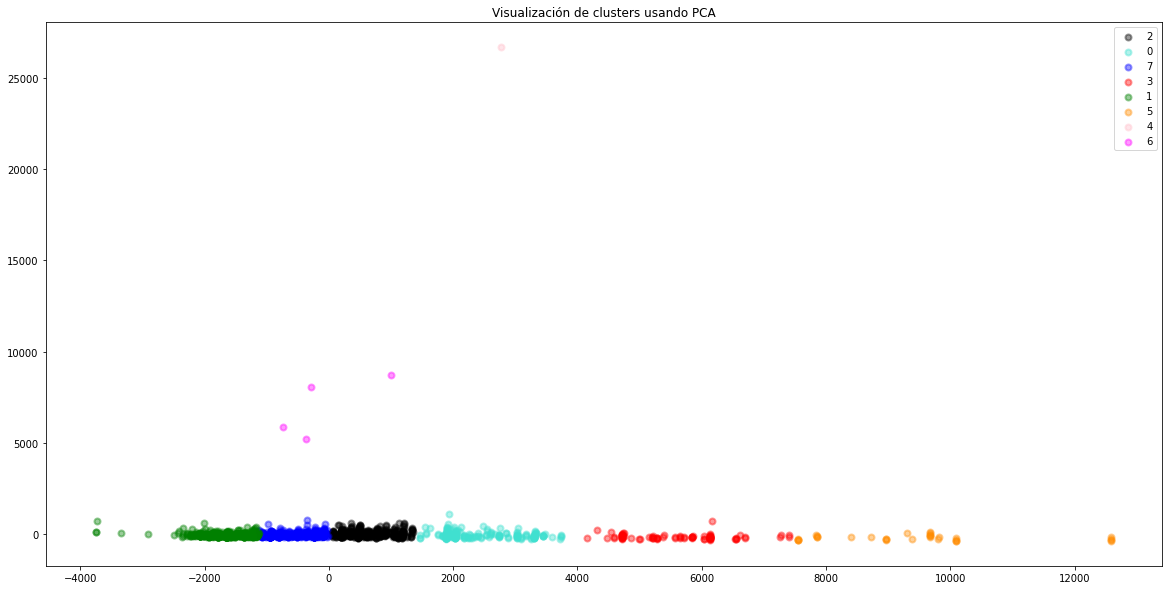

In [46]:
plt.figure(figsize=(20, 10))
lw = 2
colors = ['black', 'turquoise', 'blue', 'RED', 'green', 'darkorange', 'pink', 'magenta']

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Visualización de clusters usando PCA')
plt.show()